In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv("text_emotions.csv")

In [3]:
dataset.head(5)

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
dataset['sentiment'].value_counts()

sentiment
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

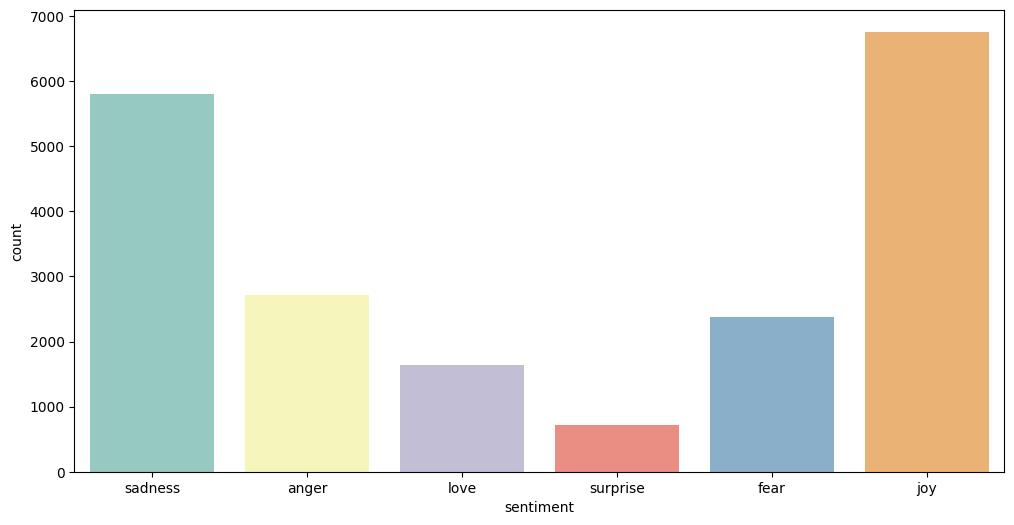

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


plt.figure(figsize = (12,6))
sns.countplot(x="sentiment", data=dataset, palette='Set3', hue="sentiment", legend=False)


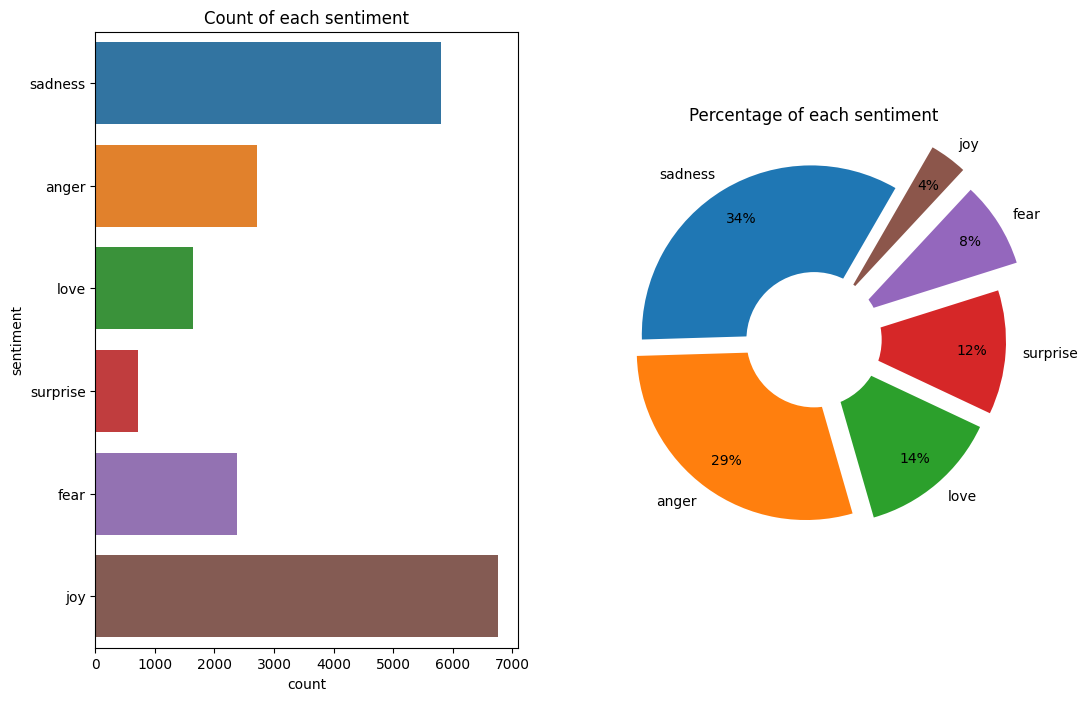

In [6]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(dataset["sentiment"].dropna().value_counts()))/sum(list(dataset["sentiment"].dropna().value_counts())))[::-1])[:]
labels = list(dataset["sentiment"].dropna().unique())[:]
sizes = dataset["sentiment"].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y="sentiment", hue="sentiment", data=dataset, ax=ax1)
ax1.set_title("Count of each sentiment")
ax2.set_title("Percentage of each sentiment")
plt.show()

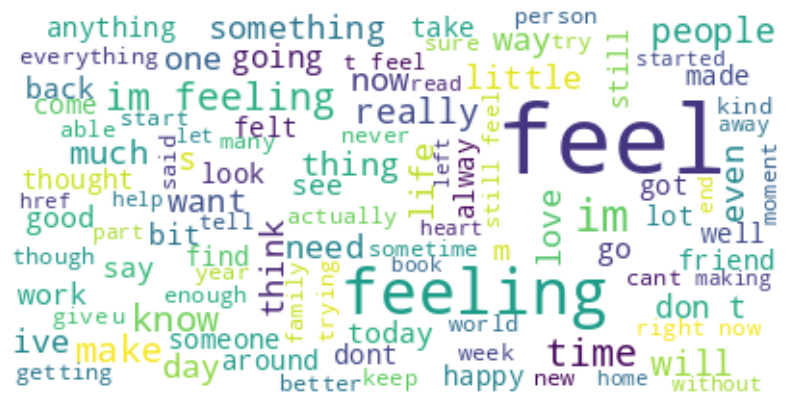

In [7]:
from wordcloud import WordCloud

text = " ".join(cat for cat in dataset["content"])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
import string
import re

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

dataset['Content_punct'] = dataset['content'].apply(lambda x: remove_punct(x))
dataset.head(10)

,content,sentiment,Content_punct
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...
9,i feel romantic too,love,i feel romantic too


In [9]:
def tokenization(text):
    text = text.lower()
    text = re.split('\W+', text)
    
    return text

dataset['Content_tokenized'] = dataset['Content_punct'].apply(lambda x: tokenization(x.lower()))
dataset.head(10)

,content,sentiment,Content_punct,Content_tokenized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late..."
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te..."
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]"


In [10]:
import nltk

nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
              'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','didnt','ive','ate','feel','keep'
                ,'brother','dad','basic','im'])

[nltk_data] Downloading package stopwords to C:\Users\Laytong
[nltk_data]     Ly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
dataset['Content_nonstop'] = dataset['Content_tokenized'].apply(lambda x: remove_stopwords(x))
dataset.head(10)

,content,sentiment,Content_punct,Content_tokenized,Content_nonstop
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,sadness,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[feeling, little, burdened, lately, wasnt, sure]"
6,ive been taking or milligrams or times recomme...,surprise,ive been taking or milligrams or times recomme...,"[ive, been, taking, or, milligrams, or, times,...","[taking, milligrams, times, recommended, amoun..."
7,i feel as confused about life as a teenager or...,fear,i feel as confused about life as a teenager or...,"[i, feel, as, confused, about, life, as, a, te...","[confused, life, teenager, jaded]"
8,i have been with petronas for years i feel tha...,joy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[petronas, years, petronas, performed, well, m..."
9,i feel romantic too,love,i feel romantic too,"[i, feel, romantic, too]",[romantic]


In [12]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

dataset['Content_lemmatized'] = dataset['Content_nonstop'].apply(lambda x: lemmatizer(x))
dataset.head()

[nltk_data] Downloading package wordnet to C:\Users\Laytong
[nltk_data]     Ly\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content,sentiment,Content_punct,Content_tokenized,Content_nonstop,Content_lemmatized
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated],[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]","[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feeling, grouchy]"


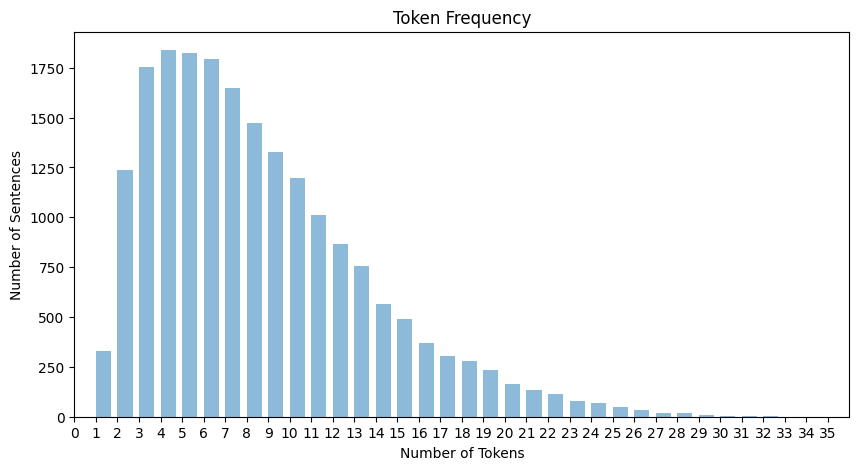

In [15]:
token_lengths = [len(t) for t in dataset['Content_lemmatized']]
plt.hist(token_lengths,bins=33,width = 0.7, fc="green",alpha=0.5)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.title('Token Frequency')
x_Values = [i for i in range(36)] 
plt.xticks(x_Values)
plt.xlim(0,36)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [16]:
def clean_text(text):
    text = remove_punct(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

In [17]:
X = dataset['content']
y = dataset['sentiment']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)


=== Logistic Regression ===
Accuracy: 88.100
Precision: 87.528
Recall: 82.458
F1-score: 84.706

Classification Report:
               precision    recall  f1-score   support

       anger       0.91      0.84      0.87       536
        fear       0.84      0.78      0.81       458
         joy       0.85      0.95      0.90      1339
        love       0.85      0.76      0.80       335
     sadness       0.93      0.92      0.93      1173
    surprise       0.87      0.70      0.77       159

    accuracy                           0.88      4000
   macro avg       0.88      0.82      0.85      4000
weighted avg       0.88      0.88      0.88      4000



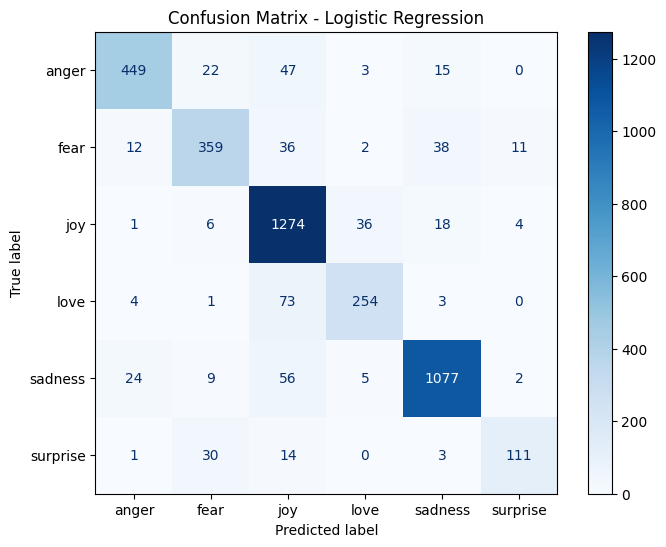


=== Random Forest ===
Accuracy: 87.850
Precision: 84.338
Recall: 84.392
F1-score: 84.354

Classification Report:
               precision    recall  f1-score   support

       anger       0.87      0.89      0.88       536
        fear       0.82      0.81      0.81       458
         joy       0.89      0.91      0.90      1339
        love       0.79      0.79      0.79       335
     sadness       0.93      0.90      0.92      1173
    surprise       0.76      0.76      0.76       159

    accuracy                           0.88      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.88      0.88      0.88      4000



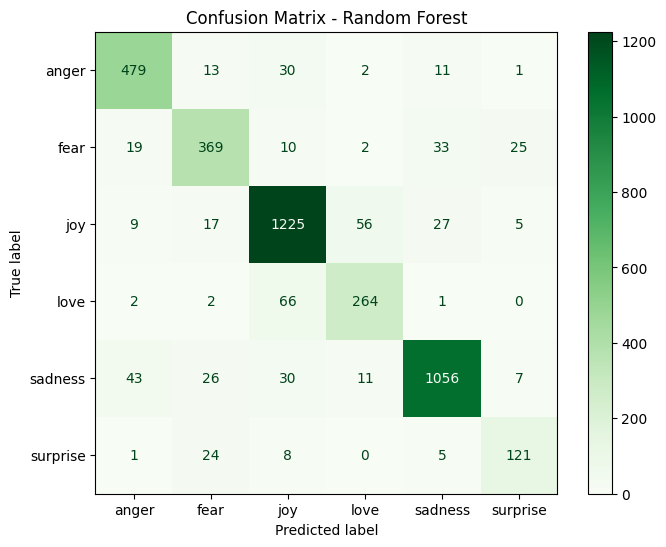


=== LinearSVC ===
Accuracy: 88.675
Precision: 85.484
Recall: 84.467
F1-score: 84.946

Classification Report:
               precision    recall  f1-score   support

       anger       0.89      0.86      0.88       536
        fear       0.82      0.83      0.82       458
         joy       0.91      0.92      0.92      1339
        love       0.79      0.80      0.80       335
     sadness       0.92      0.93      0.92      1173
    surprise       0.79      0.73      0.76       159

    accuracy                           0.89      4000
   macro avg       0.85      0.84      0.85      4000
weighted avg       0.89      0.89      0.89      4000



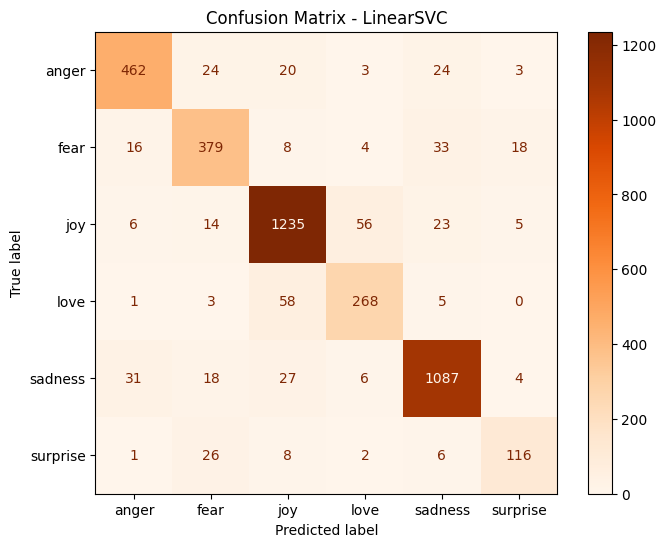


=== Multinomial Naive Bayes ===
Accuracy: 80.125
Precision: 85.272
Recall: 62.840
F1-score: 66.775

Classification Report:
               precision    recall  f1-score   support

       anger       0.92      0.71      0.80       536
        fear       0.83      0.65      0.73       458
         joy       0.78      0.95      0.86      1339
        love       0.90      0.40      0.55       335
     sadness       0.78      0.94      0.85      1173
    surprise       0.91      0.13      0.22       159

    accuracy                           0.80      4000
   macro avg       0.85      0.63      0.67      4000
weighted avg       0.82      0.80      0.78      4000



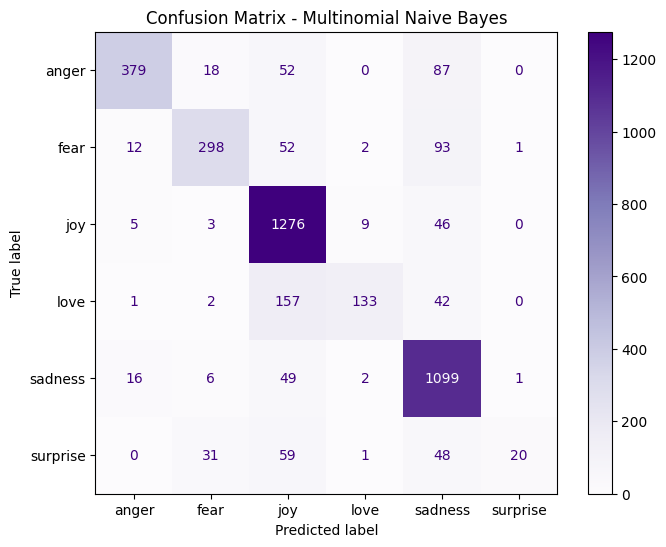

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# Function to clean text (replace this with your actual function)
def clean_text(text):
    text = remove_punct(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

# Function to train, predict, and evaluate a model pipeline
def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name="Model", cmap="Blues"):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n=== {model_name} ===")
    print('Accuracy:', '{0:.3f}'.format(acc * 100))
    print('Precision:', '{0:.3f}'.format(prec * 100))
    print('Recall:', '{0:.3f}'.format(rec * 100))
    print('F1-score:', '{0:.3f}'.format(f1 * 100))
    print('\nClassification Report:\n', classification_report(y_test, y_pred))

    # Confusion Matrix Display
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))
    cm_display.plot(ax=ax, cmap=cmap)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return acc  # Return accuracy

# Define all pipelines
pipe_lr = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('lr', LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=10000))
])

pipe_rf = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe_svc = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('svc', LinearSVC(C=1.0, max_iter=10000))
])

pipe_nb = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('nb', MultinomialNB(alpha=1.0))
])

# Assuming you already have X_train, X_test, y_train, y_test defined

# Evaluate and collect accuracies
lr_acc = evaluate_model(pipe_lr, X_train, X_test, y_train, y_test, model_name="Logistic Regression", cmap="Blues")
rf_acc = evaluate_model(pipe_rf, X_train, X_test, y_train, y_test, model_name="Random Forest", cmap="Greens")
svc_acc = evaluate_model(pipe_svc, X_train, X_test, y_train, y_test, model_name="LinearSVC", cmap="Oranges")
nb_acc = evaluate_model(pipe_nb, X_train, X_test, y_train, y_test, model_name="Multinomial Naive Bayes", cmap="Purples")



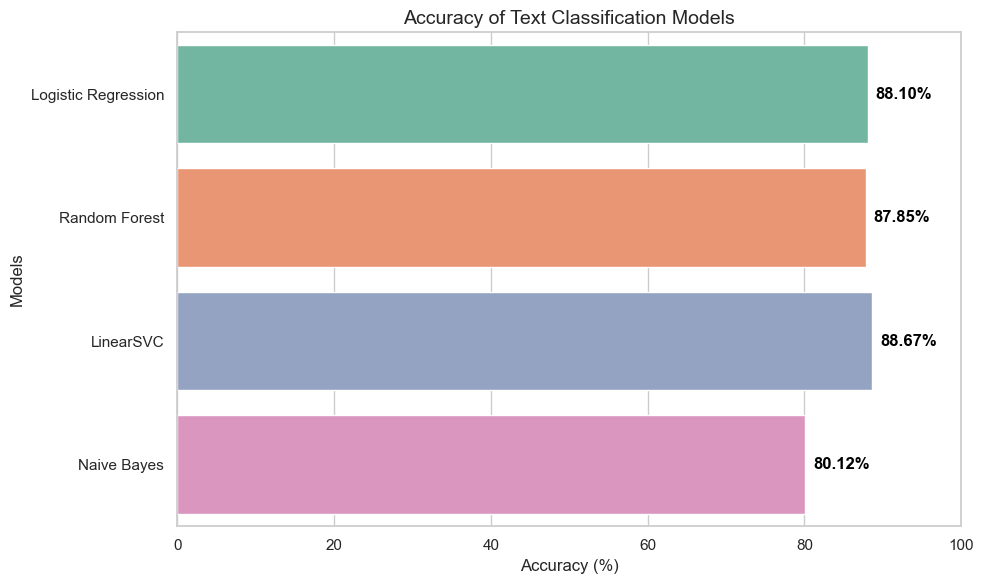

In [20]:
# Bar Chart to compare model accuracies
models = ['Logistic Regression', 'Random Forest', 'LinearSVC', 'Naive Bayes']
accuracies = [lr_acc * 100, rf_acc * 100, svc_acc * 100, nb_acc * 100]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=accuracies, y=models, palette="Set2")

# Annotate accuracy values on bars
for i, acc in enumerate(accuracies):
    plt.text(acc + 1, i, f"{acc:.2f}%", va='center', color='black', fontweight='bold')

plt.xlim(0, 100)
plt.title("Accuracy of Text Classification Models", fontsize=14)
plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.tight_layout()
plt.show()


In [21]:
import joblib

pipeline_file = open("pipeline_logistic_regression.pkl", "wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()